<a href="https://colab.research.google.com/github/Hyunjoon83/Baekjoon/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듦
X,y=make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킴
logreg=LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가
print("Test Set Score: {:.2f}".format(logreg.score(X_test,y_test)))

Test Set Score: 0.88


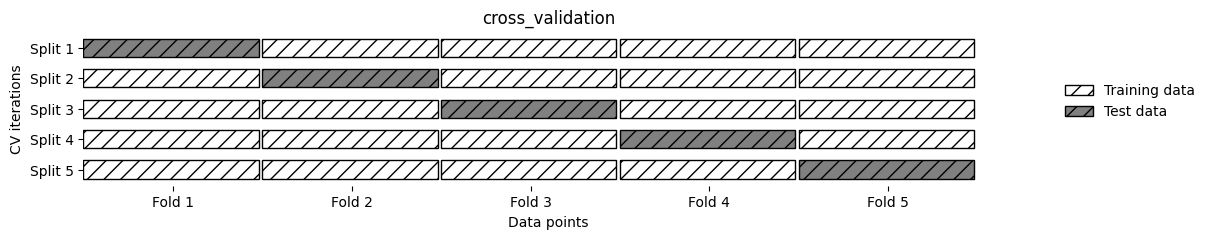

In [ ]:
import mglearn
mglearn.plots.plot_cross_validation()

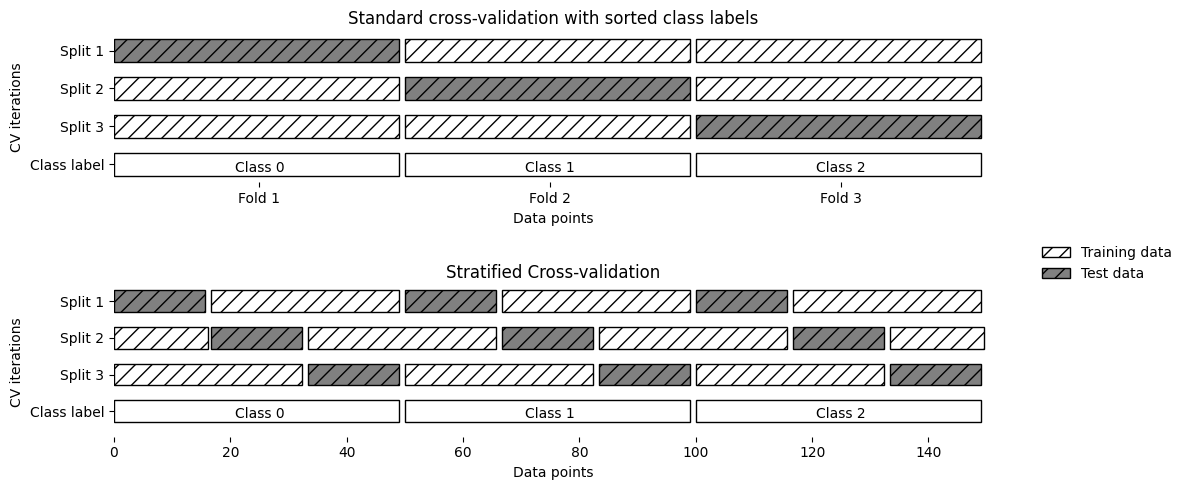

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

mglearn.plots.plot_stratified_cross_validation()

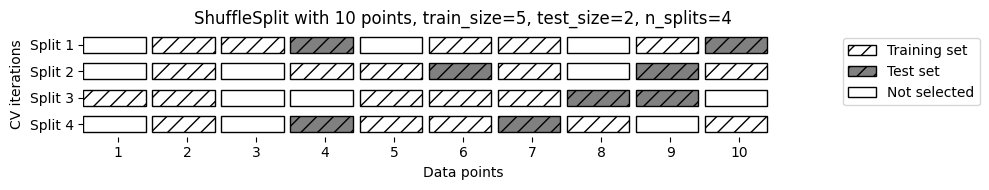

In [ ]:
mglearn.plots.plot_shuffle_split()

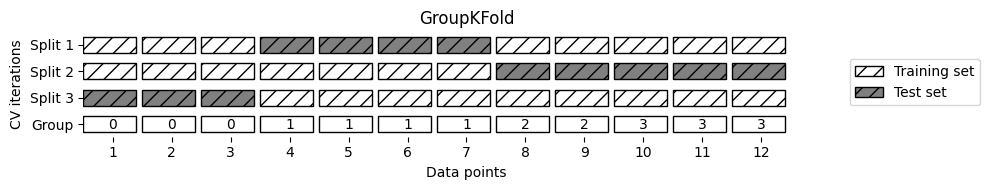

In [ ]:
mglearn.plots.plot_group_kfold()

In [ ]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test=train_test_split(
    iris.data, iris.target, random_state=0
)
print("Training Set Size: {}  Test Set Size: {}".format(
    X_train.shape[0], X_test.shape[0]
))

best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
  for C in [0.001,0.01,0.1,1,10,100]:
    # 매개변수의 각 조합에 대해 SVC를 훈련시킴
    svm=SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)
    # 테스트 세트로 SVC를 평가
    score=svm.score(X_test, y_test)
    # 점수가 더 높으면 매개변수와 함께 기록
    if score>best_score:
      best_score=score
      best_parameters={'C':C,'gamma':gamma}

print("Best Score: {:.2f}".format(best_score))
print("Best Fit Parameter: {}".format(best_parameters))

Training Set Size: 112  Test Set Size: 38
Best Score: 0.97
Best Fit Parameter: {'C': 100, 'gamma': 0.001}


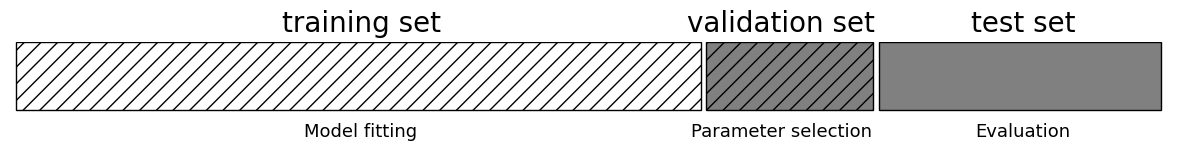

In [ ]:
mglearn.plots.plot_threefold_split()

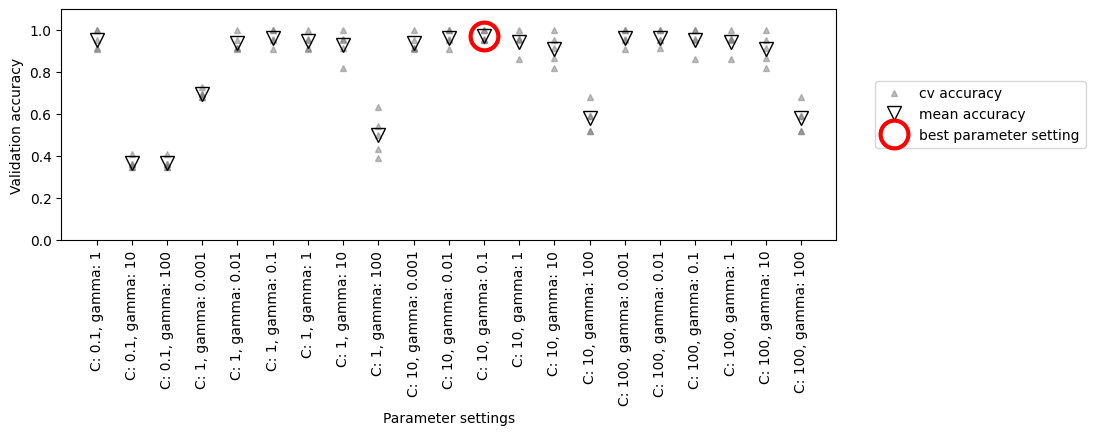

In [ ]:
mglearn.plots.plot_cross_val_selection()

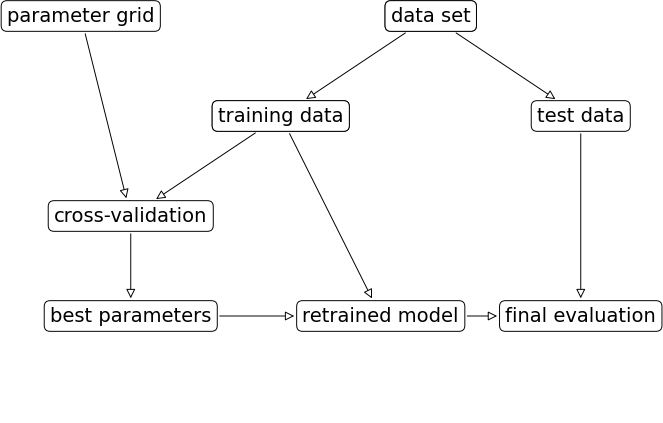

In [ ]:
mglearn.plots.plot_grid_search_overview()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.001,0.01,0.1,1,10,100],
            'gamma':[0.001,0.01,0.1,1,10,100]}
grid_search=GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

import pandas as pd
# 데이터 프레임으로 변환
results=pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 행을 출력
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003231,0.002314,0.001202,0.000158,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.008507,0.005711,0.001728,0.000929,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.008052,0.004936,0.006621,0.004969,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.008269,0.005041,0.005836,0.005495,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.006149,0.004219,0.005331,0.004913,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


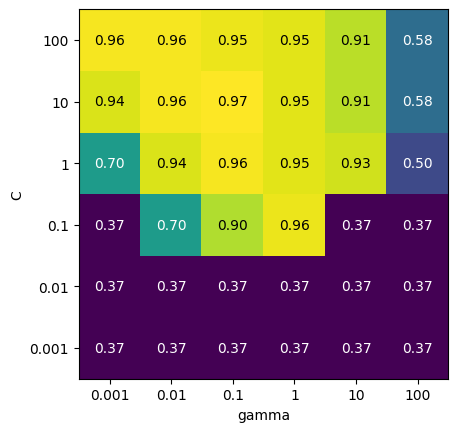

In [ ]:
import numpy as np
scores=np.array(results.mean_test_score).reshape(6,6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C',yticklabels=param_grid['C'],cmap="viridis")

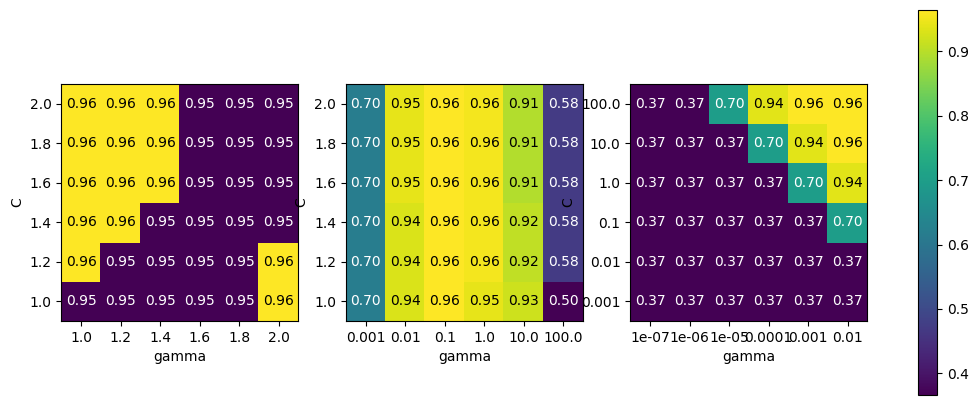

In [ ]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,3,figsize=(13,5))
param_grid_linear={'C':np.linspace(1,2,6),
                   'gamma':np.linspace(1,2,6)}
param_grid_one_log={'C':np.linspace(1,2,6),
                   'gamma':np.logspace(-3,2,6)}
param_grid_range={'C':np.logspace(-3,2,6),
                  'gamma':np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear,param_grid_one_log,
                           param_grid_range],axes):
  grid_search=GridSearchCV(SVC(), param_grid, cv=5)
  grid_search.fit(X_train, y_train)
  scores=grid_search.cv_results_['mean_test_score'].reshape(6,6)

  #교차 검증 평균 점수 히트맵 그래프
  scores_image=mglearn.tools.heatmap(
      scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],
      yticklabels=param_grid['C'], cmap="viridis",ax=ax
  )
plt.colorbar(scores_image, ax=axes.tolist())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg=logreg.predict(X_test)

confusion=confusion_matrix(y_test, pred_logreg)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[13  0  0]
 [ 0 13  3]
 [ 0  0  9]]


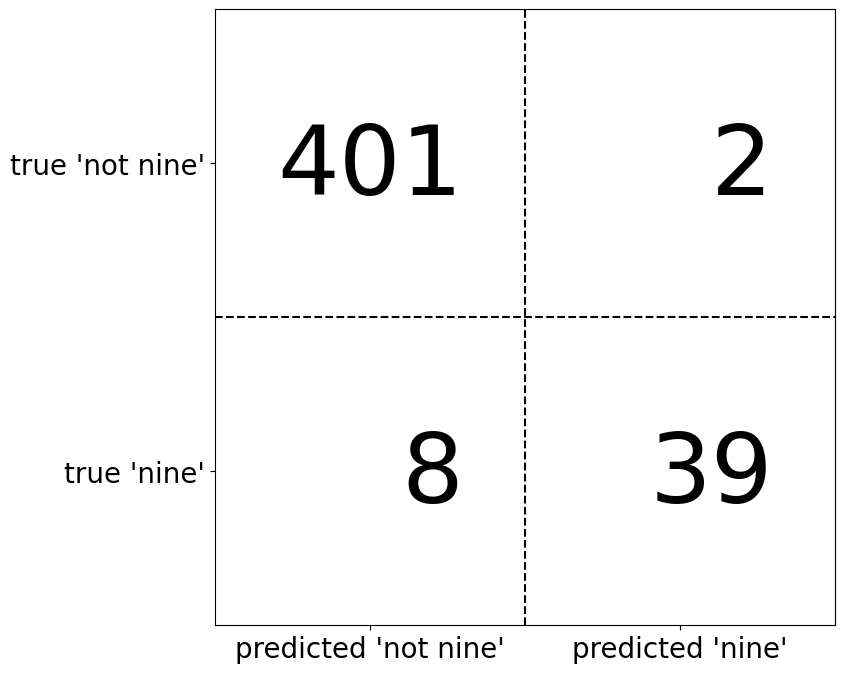

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()

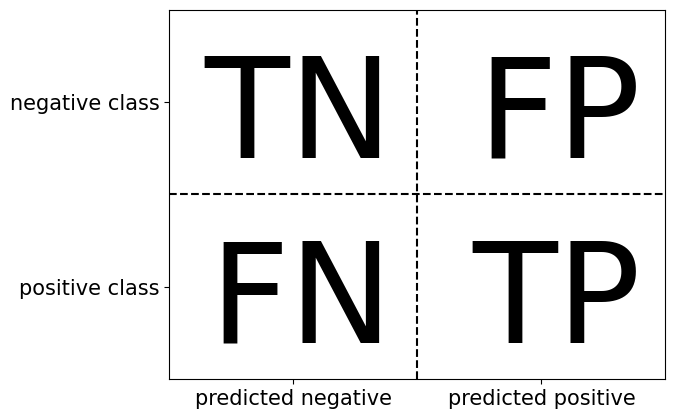

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

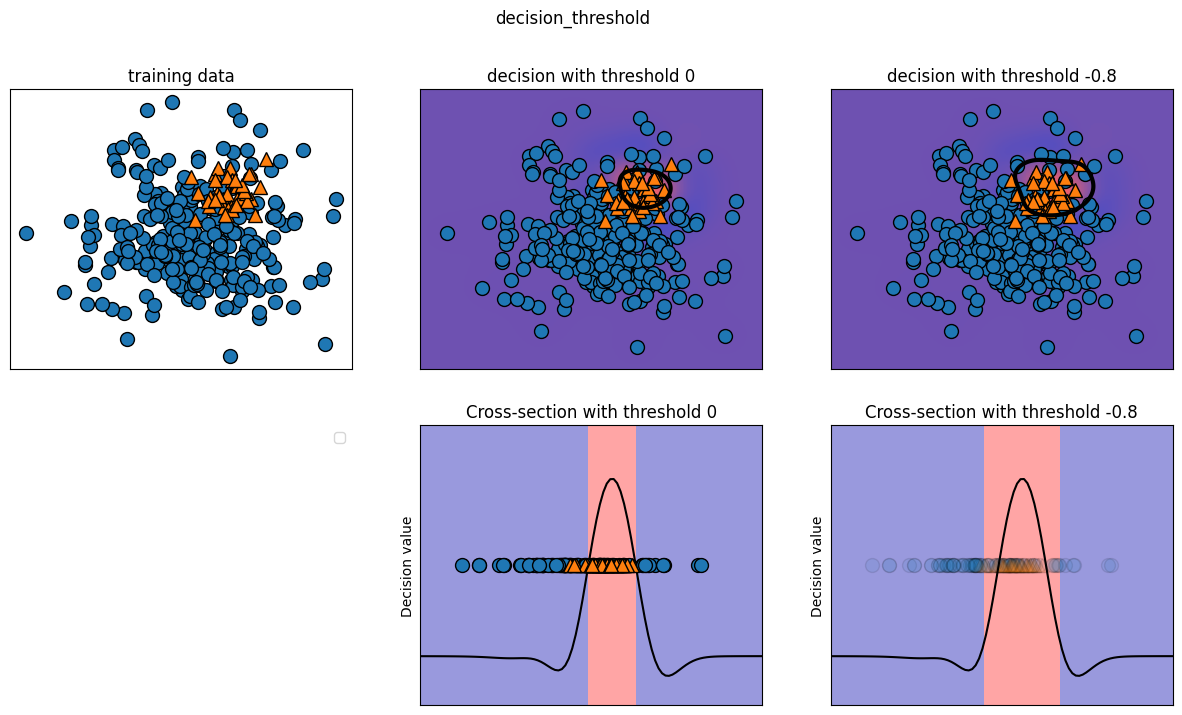

In [ ]:
from mglearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn

X, y = make_blobs(n_samples=(400, 50), centers=[(-2, -2), (2, 2)], cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained an SVC model and have X_test and y_test prepared
y_pred = svc.predict(X_test)

# Generate and print the classification   report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        96
           1       0.00      0.00      0.00        17

    accuracy                           0.85       113
   macro avg       0.42      0.50      0.46       113
weighted avg       0.72      0.85      0.78       113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_lower_threshold=svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        96
           1       0.00      0.00      0.00        17

    accuracy                           0.85       113
   macro avg       0.42      0.50      0.46       113
weighted avg       0.72      0.85      0.78       113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
